<a href="https://colab.research.google.com/github/MauricioMatheus/Projeto_Indices_de_Pobreza_no_Brasil/blob/main/Maur%C3%ADcio_Galv%C3%A3o_Projeto_de_Machine_Learning_(%C3%8Dndices_de_pobreza_no_Brasil).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
filename = 'indices_pobreza_consolidado.csv'
dados = pd.read_csv(filename, encoding = 'latin_1', sep = ',')
display(dados)

,referencia,periodo,pobreza,extrema_pobreza,total,populacao_estimada,porcentagem_pobreza,porcentagem_extrema_pobreza,porcentagem_vulnerabilidade,familias_pobreza,...,familias_vulnerabilidade,indigenas_pobreza,indigenas_extrema_pobreza,indigenas_vulnerabilidade,quilombolas_pobreza,quilombolas_extrema_pobreza,quilombolas_vulnerabilidade,ciganos_pobreza,ciganos_extrema_pobreza,ciganos_vulnerabilidade
0,08/2012,201208,19370363,44381455,63751818,193976530,0.10,0.23,0.33,5265743,...,18162964,14144,86593,100737,7927,57407,65334,119,757,876
1,09/2012,201209,19371279,44554715,63925994,193976530,0.10,0.23,0.33,5278170,...,18284925,14157,87216,101373,8022,58018,66040,123,825,948
2,10/2012,201210,19376665,44652093,64028758,193976530,0.10,0.23,0.33,5288902,...,18365268,14171,87397,101568,8081,58468,66549,131,888,1019
3,11/2012,201211,19381040,44723215,64104255,193976530,0.10,0.23,0.33,5298295,...,18429654,14182,87697,101879,8198,59193,67391,142,925,1067
4,12/2012,201212,19392882,44684759,64077641,193976530,0.10,0.23,0.33,5311337,...,18472436,14209,87820,102029,8314,60250,68564,143,978,1121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,05/2022,202205,8979446,46998630,55978076,213317639,0.04,0.22,0.26,3200245,...,21645007,13479,153358,166837,11674,176426,188100,778,7495,8273
118,06/2022,202206,9042994,47268983,56311977,213317639,0.04,0.22,0.26,3236172,...,22000507,13878,156599,170477,11720,179663,191383,767,7713,8480
119,07/2022,202207,9173896,47695827,56869723,213317639,0.04,0.22,0.27,3306740,...,22504546,14463,161439,175902,11843,184928,196771,766,7914,8680
120,08/2022,202208,9346851,48369266,57716117,213317639,0.04,0.23,0.27,3404214,...,23224331,15074,166023,181097,12148,190505,202653,798,8196,8994


# **REGRESSÃO LINEAR SIMPLES**

In [ ]:
#Criando um segundo DataFrame apenas com duas colunas, com o intuito de aplicar a regressão linear simples
SLR_data = dados.loc[:, ['periodo', 'pobreza']] #SLR = Simple Linear Regression
display(SLR_data)

,periodo,pobreza
0,201208,19370363
1,201209,19371279
2,201210,19376665
3,201211,19381040
4,201212,19392882
...,...,...
117,202205,8979446
118,202206,9042994
119,202207,9173896
120,202208,9346851


In [ ]:
SLR_data.pobreza = SLR_data.pobreza/ 1000000 #Deixando os números da pobreza na faixa dos milhões
display(SLR_data)

,periodo,pobreza
0,201208,19.370363
1,201209,19.371279
2,201210,19.376665
3,201211,19.381040
4,201212,19.392882
...,...,...
117,202205,8.979446
118,202206,9.042994
119,202207,9.173896
120,202208,9.346851


# Analisando a correlação entre as variáveis

In [ ]:
SLR_correlation = SLR_data.corr()
SLR_correlation

,periodo,pobreza
periodo,1.00000,-0.95713
pobreza,-0.95713,1.00000


# Visualizando a correlação utilizando heatmap

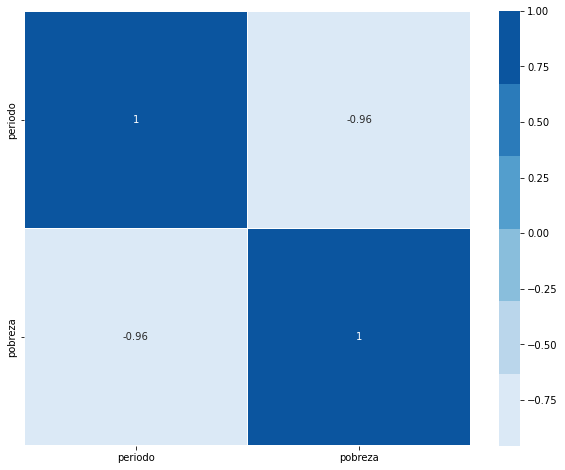

In [ ]:
f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(SLR_correlation, cmap=sns.color_palette("Blues"), linewidths= .5, annot=True);

# Visualizando as duas variáveis em um Scatter plot

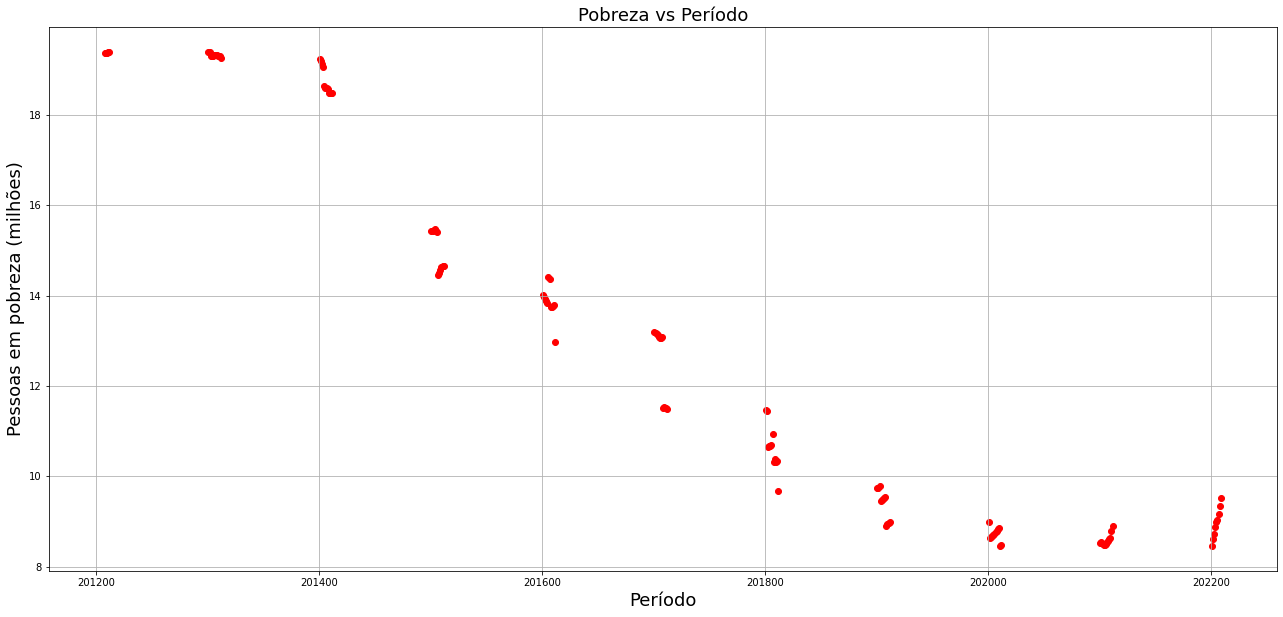

In [ ]:
plt.figure(figsize=(22,10))
plt.scatter(SLR_data['periodo'], SLR_data['pobreza'], color= 'red')
plt.title('Pobreza vs Período', fontsize=18)
plt.xlabel('Período', fontsize= 18)
plt.ylabel('Pessoas em pobreza (milhões)', fontsize= 18)
plt.grid(True)
plt.show()

# Iniciando a regressão linear simples

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
x_df = SLR_data.drop('pobreza', axis = 1) #Data
pobreza_y = SLR_data['pobreza'] #Target
x_df #x_dataframe


,periodo
0,201208
1,201209
2,201210
3,201211
4,201212
...,...
117,202205
118,202206
119,202207
120,202208


In [ ]:
simple_linear_regression = LinearRegression()
simple_linear_regression.fit(x_df, pobreza_y)

LinearRegression()

In [ ]:
slr_rq = simple_linear_regression.score(x_df, pobreza_y)
print(f'Coeficiente de determinação (R²): {slr_rq}')

Coeficiente de determinação (R²): 0.916097906922091


In [ ]:
#Intercept and slope values:
intercepto = simple_linear_regression.intercept_
slope = simple_linear_regression.coef_
print(f'Intercept: {intercepto}')
print(f'Slope: {slope}')

Intercept: 2647.787972356966
Slope: [-0.01306168]


# Gerando um modelo de previsão para todos os períodos

In [ ]:
y_predict = simple_linear_regression.predict(x_df)

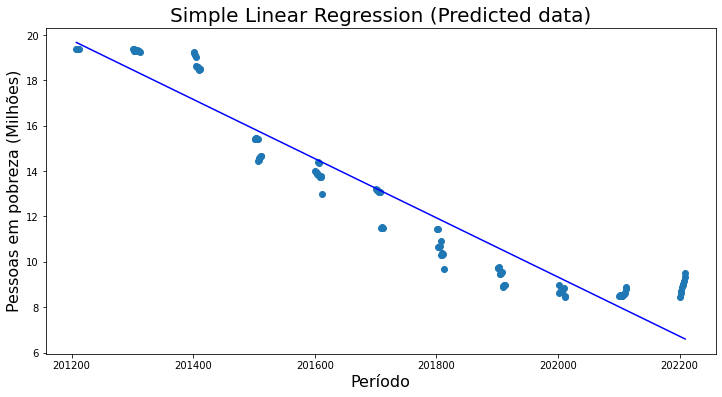

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(SLR_data['periodo'], SLR_data['pobreza'])
plt.plot(SLR_data['periodo'], y_predict, 'blue')
plt.title('Simple Linear Regression (Predicted data)', fontsize = 20)
plt.xlabel('Período', fontsize= 16)
plt.ylabel('Pessoas em pobreza (Milhões)', fontsize= 16)
plt.show()

# Comparando os dados reais de pobreza com os dados previstos para os devidos períodos

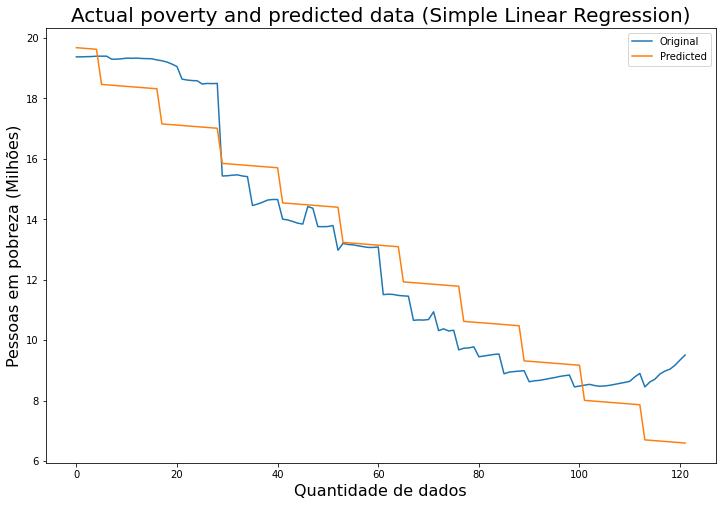

In [ ]:
plt.figure(figsize = (12, 8))
x_ax = range(len(SLR_data['pobreza']))
plt.plot(x_ax, SLR_data['pobreza'], label = "Original")
plt.plot(x_ax, y_predict, label = 'Predicted')
plt.xlabel('Quantidade de dados', fontsize = 16)
plt.ylabel('Pessoas em pobreza (Milhões)', fontsize = 16)
plt.title('Actual poverty and predicted data (Simple Linear Regression)', fontsize = 20)
plt.legend()
plt.show()
#Não foi utilizada a função Train_test_split para separar dados de treino e de teste.
#Por causa disso o modelo não teve uma acurácia tão boa quanto o seguinte no qual foi utilizado a regressão linear múltipla.

# **REGRESSÃO LINEAR MÚLTIPLA**

In [ ]:
#Selecionando colunas para análise
MLR_data = dados.groupby('periodo').aggregate({
    'periodo': 'first',
    'populacao_estimada': 'first',
    'pobreza': 'first',
    'extrema_pobreza': 'first',
    'familias_pobreza': 'first',
    'familias_extrema_pobreza': 'first',

})
display(MLR_data) #MLR = Multiple Linear Regression


,periodo,populacao_estimada,pobreza,extrema_pobreza,familias_pobreza,familias_extrema_pobreza
periodo,,,,,,
201208,201208,193976530,19370363,44381455,5265743,12897221
201209,201209,193976530,19371279,44554715,5278170,13006755
201210,201210,193976530,19376665,44652093,5288902,13076366
201211,201211,193976530,19381040,44723215,5298295,13131359
201212,201212,193976530,19392882,44684759,5311337,13161099
...,...,...,...,...,...,...
202205,202205,213317639,8979446,46998630,3200245,18444762
202206,202206,213317639,9042994,47268983,3236172,18764335
202207,202207,213317639,9173896,47695827,3306740,19197806


In [ ]:
MLR_data.pobreza = MLR_data.pobreza/1000000
MLR_data

,periodo,populacao_estimada,pobreza,extrema_pobreza,familias_pobreza,familias_extrema_pobreza
periodo,,,,,,
201208,201208,193976530,19.370363,44381455,5265743,12897221
201209,201209,193976530,19.371279,44554715,5278170,13006755
201210,201210,193976530,19.376665,44652093,5288902,13076366
201211,201211,193976530,19.381040,44723215,5298295,13131359
201212,201212,193976530,19.392882,44684759,5311337,13161099
...,...,...,...,...,...,...
202205,202205,213317639,8.979446,46998630,3200245,18444762
202206,202206,213317639,9.042994,47268983,3236172,18764335
202207,202207,213317639,9.173896,47695827,3306740,19197806


In [ ]:
correlation = MLR_data.corr() #Correlação entre as variáveis
correlation

,periodo,populacao_estimada,pobreza,extrema_pobreza,familias_pobreza,familias_extrema_pobreza
periodo,1.000000,0.968085,-0.957130,-0.192480,-0.924877,0.557700
populacao_estimada,0.968085,1.000000,-0.936586,-0.287044,-0.907990,0.454083
pobreza,-0.957130,-0.936586,1.000000,0.438996,0.994101,-0.328129
extrema_pobreza,-0.192480,-0.287044,0.438996,1.000000,0.515121,0.687717
familias_pobreza,-0.924877,-0.907990,0.994101,0.515121,1.000000,-0.235586
familias_extrema_pobreza,0.557700,0.454083,-0.328129,0.687717,-0.235586,1.000000


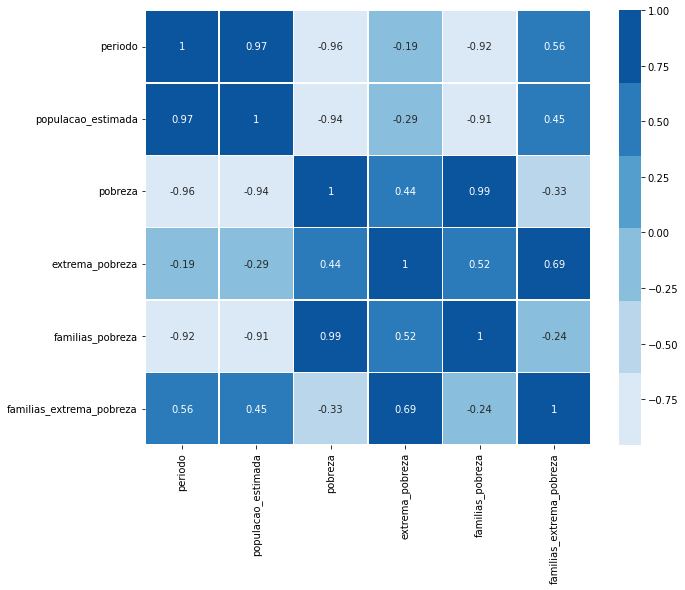

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation, cmap=sns.color_palette("Blues"), linewidths=.5, annot=True);

In [ ]:
#Criando um dataframe com todas as variáveis exceto "pobreza", e outro somente com "pobreza" para aplicação da regressão linear múltipla
x2 = MLR_data.drop(['pobreza'], axis = 1) #Data
y2 = MLR_data.pobreza #Target

In [ ]:
multiple_linear_regression = LinearRegression()
multiple_linear_regression.fit(x2, y2) #treinando o modelo
y2_pred = multiple_linear_regression.predict(x2)

In [ ]:
mlr_rsq = multiple_linear_regression.score(x2, y2) #Analisando o coeficiente de determinação
print(f'Coeficiente de determinação (R²): {mlr_rsq}')

Coeficiente de determinação (R²): 0.9992451070602061


  Por garantia de um modelo de regressão linear mais confiável, utilizei o R² Ajustado para uma melhor coerência no resultado após a inclusão de novos termos.

In [ ]:
R2 = mlr_rsq
n = 122 #Number of rows
p = 6 #Number of columns
adj_R2 = 1-(1-R2)*(n-1)/(n-p-1)
print(f'Coeficiente de determinação ajustado: {adj_R2}')

Coeficiente de determinação ajustado: 0.9992057213416081


In [ ]:
print(f'Intercepto: {multiple_linear_regression.intercept_}')


Intercepto: 210.7726900762916


O Intercepto representa o valor de b0 da equação da regressão linear.
O valor é a previsão do modelo quando o valor de X é zero.


In [ ]:
#Separando dados de treino e teste, e usando uma divisão de 80% de dados para treino e 20% para teste.
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.2, random_state = 0)
testes_multiple_linear_regression = LinearRegression() #Regressão linear utilizada para testar os novos inputs
testes_multiple_linear_regression.fit(x2_train, y2_train)


LinearRegression()

In [ ]:
coeff_MLR_dados = pd.DataFrame(multiple_linear_regression.coef_, x2.columns, columns = ['Coefficient'])
coeff_MLR_dados #[slope]

,Coefficient
periodo,-1.027606e-03
populacao_estimada,-2.352244e-08
extrema_pobreza,1.979781e-07
familias_pobreza,3.284313e-06
familias_extrema_pobreza,-4.781943e-07


O Coeficiente, neste caso, os coeficientes representam os “pesos” das variáveis nos modelos, nesta ocasião, na equação os identificamos como b1, b2, b3. O significado de cada medida é a previsão da adição de cada valor dos coeficientes quando o valor de x é aumentado em um. Exemplo, quando X aumenta em 1 é adicionado o valor de -1027.60 **[Em escala real]** no coeficiente do periodo sobre o valor a ser previsto. [Está na faixa de 1*10^-3 pelo motivo de que os valores da pobreza foram divididos por um milhão com o intuito de deixá-los mais analisáveis]

In [ ]:
y2_pred_teste = testes_multiple_linear_regression.predict(x2_test)
print(f'Mean Absolute Error (MAE): {metrics.mean_absolute_error(y2_test, y2_pred_teste)}')

Mean Absolute Error (MAE): 0.08215289342629944


Com o MAE podemos ver que nosso algoritmo erra a quantidade de pessoas em pobreza em 82152.89 **[Em escala real]**. Tendo em vista que atualmente a população brasileira é de 214 milhões, isso quer dizer que o erro absoluto é de aproximadamente 0.038%.

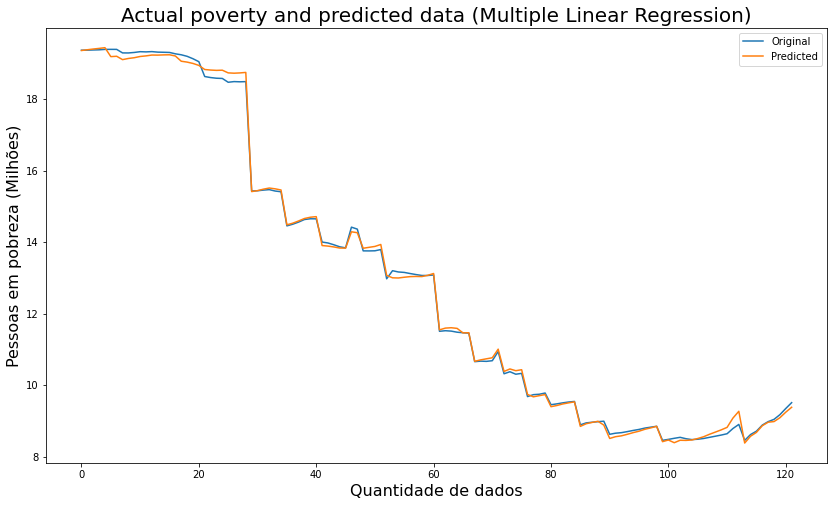

In [ ]:
plt.figure(figsize = (14,8))
x_ax2 = range(len(MLR_data['pobreza']))
plt.title('Actual poverty and predicted data (Multiple Linear Regression)', fontsize = 20)
plt.xlabel('Quantidade de dados', fontsize = 16)
plt.ylabel('Pessoas em pobreza (Milhões)', fontsize = 16)
plt.plot(x_ax2, MLR_data['pobreza'], label = 'Original')
plt.plot(x_ax2, y2_pred, label = 'Predicted')
plt.legend()
plt.show()

In [ ]:
print('Predicted response: ', y2_pred, sep= '\n') #Previsão

Predicted response: 
[19.36096622 19.38267592 19.40288668 19.42049188 19.44046334 19.19036123
 19.20024044 19.10627578 19.13883796 19.16011815 19.19445516 19.2110131
 19.2345587  19.232597   19.23892337 19.24198634 19.20797548 19.06161759
 19.0373242  18.99940275 18.94494471 18.83050841 18.81476054 18.80596376
 18.81081925 18.73558082 18.72691835 18.73462088 18.74837764 15.4147437
 15.4409962  15.48259999 15.51405811 15.49232863 15.45943204 14.48534713
 14.53055883 14.59365633 14.66234339 14.69734829 14.71428325 13.90527862
 13.89013483 13.86597195 13.83539171 13.83307797 14.28974827 14.264846
 13.82947616 13.85542244 13.88043978 13.93488031 13.07038452 13.00265519
 12.99771954 13.0185398  13.03570394 13.04064419 13.03752589 13.07244441
 13.12307618 11.54650319 11.5955727  11.60598927 11.58806147 11.46189568
 11.46601218 10.66675635 10.70636576 10.73670313 10.76599437 11.00681721
 10.38293364 10.45290724 10.4040169  10.43138502  9.73939333  9.67359808
  9.70543464  9.73635649  9.397250